<a href="https://colab.research.google.com/github/manas-mahawar/AI_CLASSROOM/blob/main/Project_EST_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/powerdemand_5min_2021_to_2024_with weather.csv')

In [ ]:
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [ ]:
df.shape

(393440, 15)

In [ ]:
df.columns

Index(['Unnamed: 0', 'datetime', 'Power demand', 'temp', 'dwpt', 'rhum',
       'wdir', 'wspd', 'pres', 'year', 'month', 'day', 'hour', 'minute',
       'moving_avg_3'],
      dtype='object')

In [ ]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393440 entries, 0 to 393439
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         393440 non-null  int64  
 1   datetime      393440 non-null  object 
 2   Power demand  393440 non-null  float64
 3   temp          393440 non-null  float64
 4   dwpt          393440 non-null  float64
 5   rhum          393440 non-null  float64
 6   wdir          392900 non-null  float64
 7   wspd          393440 non-null  float64
 8   pres          393440 non-null  float64
 9   year          393440 non-null  int64  
 10  month         393440 non-null  int64  
 11  day           393440 non-null  int64  
 12  hour          393440 non-null  int64  
 13  minute        393440 non-null  int64  
 14  moving_avg_3  393438 non-null  float64
dtypes: float64(8), int64(6), object(1)
memory usage: 45.0+ MB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime')
df.set_index('datetime', inplace=True)

In [ ]:
df.head()

,index,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
datetime,,,,,,,,,,,,,,
2021-01-01 00:30:00,0,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
2021-01-01 00:35:00,1,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2021-01-01 00:40:00,2,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
2021-01-01 00:45:00,3,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
2021-01-01 00:50:00,4,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


#PreProcessing and EDA

In [ ]:
df.isnull().sum()

,0
index,0
Power demand,0
temp,0
dwpt,0
rhum,0
wdir,540
wspd,0
pres,0
year,0
month,0


Dealing with missing values

In [ ]:
df = df.interpolate(method='time')
df['wdir'] = df['wdir'].ffill().bfill()
df['moving_avg_3'] = df['moving_avg_3'].ffill().bfill()

In [ ]:
df.isnull().sum()

,0
index,0
Power demand,0
temp,0
dwpt,0
rhum,0
wdir,0
wspd,0
pres,0
year,0
month,0


Splitting data

In [ ]:
df['dayofweek'] = df.index.dayofweek
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

In [ ]:
target_scaler = MinMaxScaler()
feature_scaler = MinMaxScaler()

scaled_target = target_scaler.fit_transform(df[['Power demand']])

scaled_features = feature_scaler.fit_transform(df[[
    'temp','dwpt','rhum','wdir','wspd','pres',
    'year','month','day','hour','minute',
    'moving_avg_3','dayofweek','is_weekend'
]])

In [ ]:
scaled_df = pd.DataFrame(
    np.hstack([scaled_target, scaled_features]),
    columns=[
        'Power demand','temp','dwpt','rhum','wdir','wspd','pres',
        'year','month','day','hour','minute',
        'moving_avg_3','dayofweek','is_weekend'
    ],
    index=df.index
)

We chose LSTM because it captures temporal dependencies better than vanilla RNN.
Lookback = 48 represents past 4 hours of 5-minute data.

In [ ]:
N = 48

data = scaled_df.values

x = []
y = []

for i in range(N,len(data)):
  x.append(data[i-N:i])
  y.append(data[i,0])

x = np.array(x)
y = np.array(y)

In [ ]:
x.shape

(393392, 48, 15)

In [ ]:
y.shape

(393392,)

#Model Training

Data Splitting

In [ ]:
train_size = int(len(x) * 0.8)
val_size = int(len(x) * 0.1)

x_train = x[:train_size]
y_train = y[:train_size]

x_val = x[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

x_test = x[train_size+val_size:]
y_test = y[train_size+val_size:]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [ ]:
model = Sequential([
    LSTM(96, return_sequences=True,
         input_shape=(x_train.shape[1], x_train.shape[2]),
         kernel_regularizer=regularizers.l2(1e-5)),
    Dropout(0.2),

    LSTM(48, return_sequences=False,
         kernel_regularizer=regularizers.l2(1e-5)),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    clipnorm=1.0
)

In [ ]:
model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

In [ ]:
callback = EarlyStopping(
    patience=3,
    restore_best_weights=True,
    monitor='val_loss'
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 48, 96)         │        43,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 48)             │        27,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,449 (283.00 KB)

 Trainable params: 72,449 (283.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[callback],
    shuffle=False
)

Epoch 1/50
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 56s 10ms/step - loss: 0.0074 - mae: 0.0545 - val_loss: 0.0021 - val_mae: 0.0295
Epoch 2/50
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - loss: 0.0015 - mae: 0.0234 - val_loss: 0.0010 - val_mae: 0.0205
Epoch 3/50
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - loss: 0.0010 - mae: 0.0193 - val_loss: 8.2502e-04 - val_mae: 0.0181
Epoch 4/50
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - loss: 8.4525e-04 - mae: 0.0171 - val_loss: 7.4245e-04 - val_mae: 0.0167
Epoch 5/50
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - loss: 7.6880e-04 - mae: 0.0160 - val_loss: 8.6851e-04 - val_mae: 0.0187
Epoch 6/50
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - loss: 6.3868e-04 - mae: 0.0143 - val_loss: 0.0015 - val_mae: 0.0273
Epoch 7/50
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - loss: 5.7601e-04 - mae: 0.0135 - val_loss: 0.0019 - val_mae: 0.0310


#Model Evaluation

In [ ]:
y_pred_scaled = model.predict(x_test)

y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))


1230/1230 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


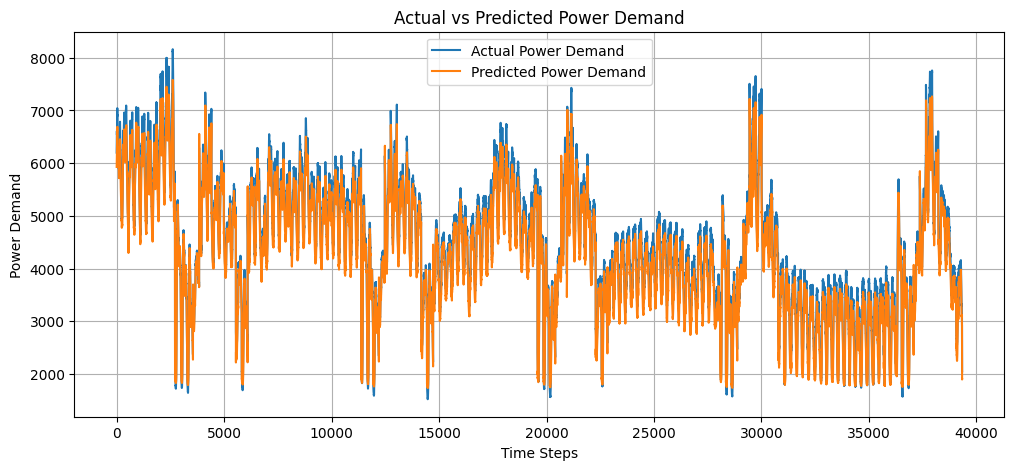

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_actual, label='Actual Power Demand')
plt.plot(y_pred, label='Predicted Power Demand')
plt.xlabel('Time Steps')
plt.ylabel('Power Demand')
plt.title('Actual vs Predicted Power Demand')
plt.legend()
plt.grid()
plt.show()


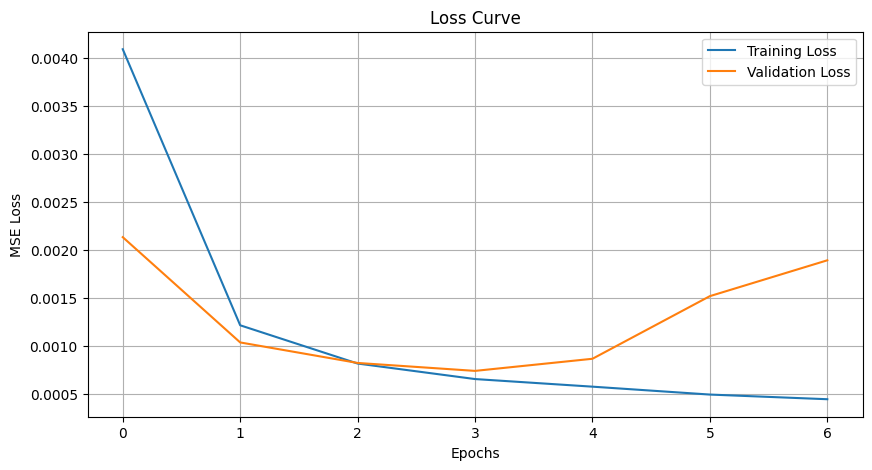

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

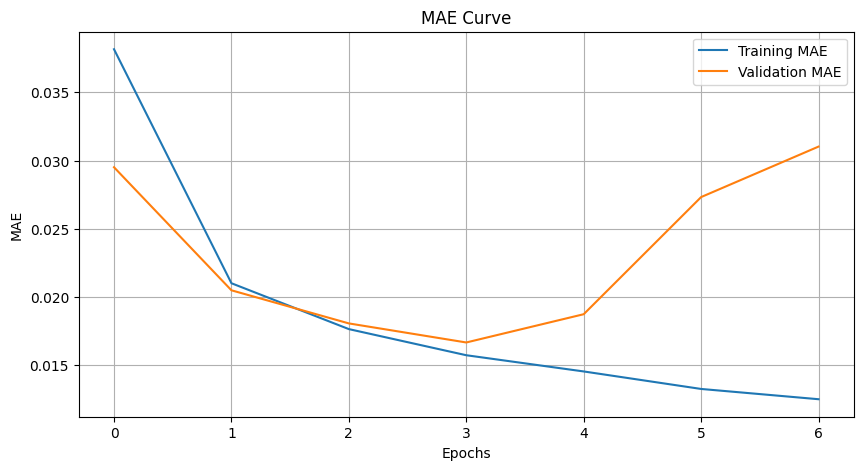

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('MAE Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
mape = mean_absolute_percentage_error(y_actual, y_pred) * 100

print("RMSE:", rmse)
print("MAPE (%):", mape)

RMSE: 236.36956394445372
MAPE (%): 5.016802868001579


#Deployment Ready

In [ ]:
# Save model
model.save("lstm_power_demand_model.h5")
print("Model saved successfully.")

# Save scalers using joblib
import joblib
joblib.dump(target_scaler, "target_scaler.pkl")
joblib.dump(feature_scaler, "feature_scaler.pkl")
print("Scalers saved successfully.")

Model saved successfully.
Scalers saved successfully.


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError as MSE

loaded_model = load_model(
    "lstm_power_demand_model.h5",
    custom_objects={
        "mse": MeanSquaredError(),
        "mae": MeanAbsoluteError()
    }
)

import joblib
loaded_target_scaler = joblib.load("target_scaler.pkl")
loaded_feature_scaler = joblib.load("feature_scaler.pkl")

print("Model and scalers loaded successfully.")


Model and scalers loaded successfully.


Predictive System

In [ ]:
def predict_next_power_demand(df, N=48):

    last_rows = df.iloc[-N:].copy()


    last_features = last_rows[[
        'temp','dwpt','rhum','wdir','wspd','pres',
        'year','month','day','hour','minute',
        'moving_avg_3','dayofweek','is_weekend'
    ]]


    scaled_features = loaded_feature_scaler.transform(last_features)
    scaled_target = loaded_target_scaler.transform(last_rows[['Power demand']])


    full_scaled = np.hstack([scaled_target, scaled_features])


    input_seq = np.array(full_scaled).reshape(1, N, -1)


    pred_scaled = loaded_model.predict(input_seq)[0][0]


    pred_real = loaded_target_scaler.inverse_transform([[pred_scaled]])[0][0]

    return pred_real

In [ ]:
next_value = predict_next_power_demand(df)
print("Next predicted power demand:", next_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Next predicted power demand: 1902.5772811322659


# Shap

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
1/1 ━━━━━━━━━━━━

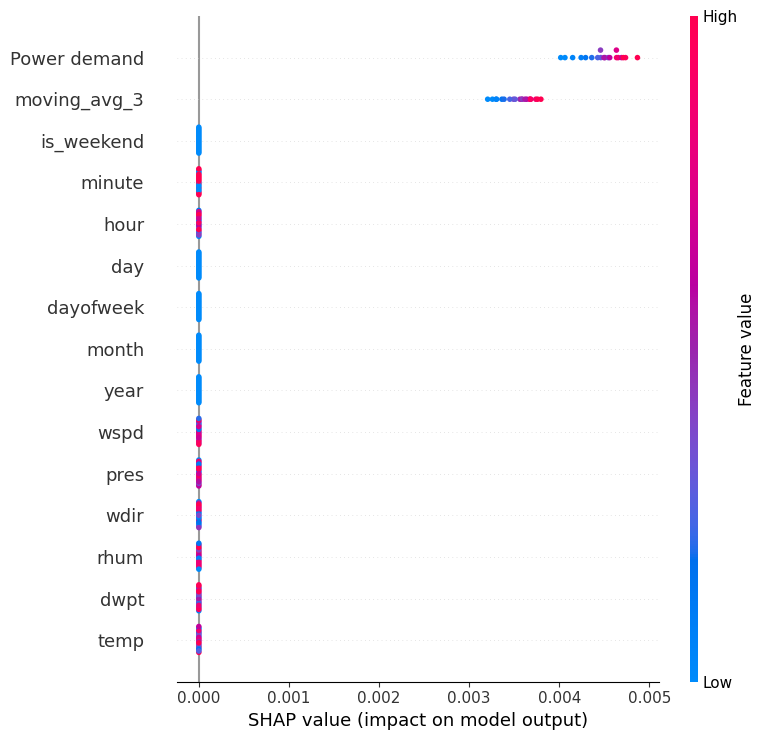

In [ ]:
import shap
import numpy as np

feature_names = [
    'Power demand',
    'temp','dwpt','rhum','wdir','wspd','pres',
    'year','month','day','hour','minute',
    'moving_avg_3','dayofweek','is_weekend'
]

background = x_val[:50].reshape(50, -1)
test_samples = x_test[:20].reshape(20, -1)

def model_predict(data):
    data = data.reshape(data.shape[0], 48, 15)
    return model.predict(data).flatten()

explainer = shap.KernelExplainer(model_predict, background)

shap_values = explainer.shap_values(test_samples)

print("SHAP computation done.")

shap_agg = shap_values.reshape(len(test_samples), 48, 15).mean(axis=1)
feat_agg = test_samples.reshape(len(test_samples), 48, 15).mean(axis=1)

shap.summary_plot(
    shap_agg,
    feat_agg,
    feature_names=feature_names
)